#  Telecom Churn Case Study



#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


### Importing Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('Display.max_columns',300)
pd.set_option('Display.max_rows',300)

In [3]:
# reading  data
df = pd.read_csv("telecom_churn_data.csv")

In [4]:
# look at initial rows of the data
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# feature type summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


`There are 99999 rows and 226 columns in the data. Mostly the columns are numeric type, but we need to inspect which are the categorical columns.`

In [6]:
# look at data statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# creating  column name list by  three major types of columns:
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

In [8]:

# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total_null'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Null_Percentage'])
pd.concat([total, percentage], axis = 1)

,Total_null,Null_Percentage
arpu_3g_6,74846,74.85
night_pck_user_6,74846,74.85
total_rech_data_6,74846,74.85
arpu_2g_6,74846,74.85
max_rech_data_6,74846,74.85
fb_user_6,74846,74.85
av_rech_amt_data_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
count_rech_2g_6,74846,74.85
count_rech_3g_6,74846,74.85


`Since Many variables have More than 70 Percent Data Missing and it can be seen as a trend for majority of data, it suggests that they might be linked in a possible manner.`

`Also it is possible that the data is not missing and its just the users have not opted so we can fill NaN values with the Median Values  or 0.`

# impute missing values
## i) Imputing with zeroes

In [9]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


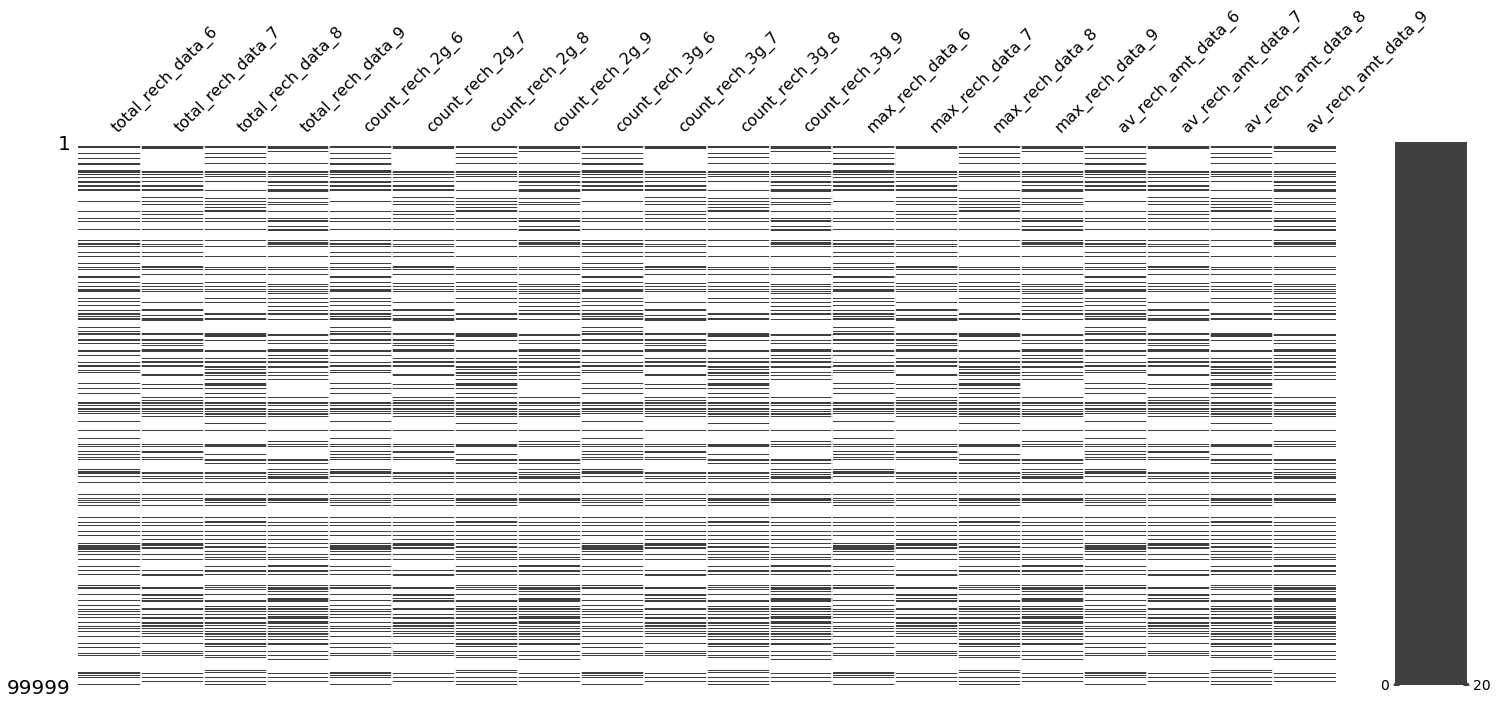

In [10]:
import statistics 
import missingno as msno

## looking at the pattern of missing values.
msno.matrix(df[recharge_cols])

`The recharge date and the recharge value are missing together in a trend which might mean that the customer didn't recharge`

In [11]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


`In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.`

In [12]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [13]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [14]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(df[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [15]:
# drop id and date columns
print("Shape before dropping: ", df.shape)
df = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


## ii) Replace NaN values in categorical variables

In [16]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
# missing value ratio
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [18]:
initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [19]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [20]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total_null'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Null_Percentage'])
pd.concat([total, percentage], axis = 1)

,Total_null,Null_Percentage
std_ic_t2t_mou_9,7745,7.75
loc_og_t2t_mou_9,7745,7.75
loc_og_t2f_mou_9,7745,7.75
loc_og_t2c_mou_9,7745,7.75
loc_og_mou_9,7745,7.75
std_og_t2t_mou_9,7745,7.75
std_og_t2m_mou_9,7745,7.75
std_og_t2f_mou_9,7745,7.75
std_og_mou_9,7745,7.75
isd_og_mou_9,7745,7.75


In [21]:

df.loc[df.std_ic_t2t_mou_9.isnull() & df.loc_og_t2f_mou_9.isnull(), ["std_ic_t2t_mou_9", "loc_og_t2f_mou_9"]].head(20)

,std_ic_t2t_mou_9,loc_og_t2f_mou_9
0,NaN,NaN
7,NaN,NaN
29,NaN,NaN
32,NaN,NaN
35,NaN,NaN
45,NaN,NaN
67,NaN,NaN
83,NaN,NaN
86,NaN,NaN
97,NaN,NaN


`From the above Null values it is evident that there is a pattern in NULL values .
Observing keenly we can see that Null Percentage is same for each variable for resepective month .
for 9th month all the variable associated with that month is =7.75.
similarly,for 8th ,7th and 6th month the null percentages are 5.38,3.86 and 3.94 respectively`




In [22]:
#imputing all these values with zero
#df = df[cat_cols].apply(lambda x: x.fillna(0))
df_cols=df.columns
for i in df_cols.values:
    if (((df[i].isnull().sum()/len(df.index))*100))>0:
        df=df.apply(lambda x: x.fillna(0))
   

In [23]:
# Checking for total count and percentage of null values in all columns of the dataframe after data imputation .

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total_null'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Null_Percentage'])
pd.concat([total, percentage], axis = 1)

,Total_null,Null_Percentage
loc_og_t2o_mou,0,0.0
isd_ic_mou_6,0,0.0
isd_ic_mou_8,0,0.0
isd_ic_mou_9,0,0.0
ic_others_6,0,0.0
ic_others_7,0,0.0
ic_others_8,0,0.0
ic_others_9,0,0.0
total_rech_num_6,0,0.0
total_rech_num_7,0,0.0


In [24]:
print("Shape after dropping : ", df.shape)

Shape after dropping :  (99999, 196)


## Define high-value customers

`we need to predict churn only for the high-value customers. `

`Define high-value customers as follows:`

`Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).`


#### New Dervied Features

Here we are Creating New Derived Feature :

These Features contains the Total Recharge Amount of Data Recharge in the Respective Months
1. total_data_rech_amt_6 
2. total_data_rech_amt_7 
3. total_data_rech_amt_8
4. total_data_rech_amt_9


In [25]:
# calculate the total data recharge amount for June and July ( number of recharges * average recharge amount)
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [26]:
# calculate total recharge amount for June and July (call recharge amount + data recharge amount)
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [27]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [28]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [29]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
highvalue_churn = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
highvalue_churn = highvalue_churn.reset_index(drop=True)
highvalue_churn.shape

(30001, 201)

In [30]:
# delete variables created to filter high-value customers
highvalue_churn = highvalue_churn.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
highvalue_churn.shape

(30001, 196)

`We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.`

# Tag  churners

For Tagging a Customer has churned or not we use the below 4 criteria columns/variables/features :

    1. total_ic_mou_9
    2. total_og_mou_9
    3. vol_2g_mb_9
    4. vol_3g_mb_9

Note : Those customers who have not utilised the above services are said/acknowledge as churn candidates/customers

In [31]:
# calculate total incoming and outgoing minutes of usage
highvalue_churn['total_calls_mou_9'] = highvalue_churn.total_ic_mou_9 + highvalue_churn.total_og_mou_9
# calculate 2g and 3g data consumption
highvalue_churn['total_internet_mb_9'] =  highvalue_churn.vol_2g_mb_9 + highvalue_churn.vol_3g_mb_9


In [32]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
highvalue_churn['churn'] = highvalue_churn.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [33]:
# delete derived variables
highvalue_churn = highvalue_churn.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [34]:
# change data type to category
highvalue_churn.churn = highvalue_churn.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(highvalue_churn.churn.value_counts()*100/highvalue_churn.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


`From above we can see that the ration is 91.8,which means there is a huge class imbalance in the dataset .we will treat that in the follwing steps :`

In [35]:
highvalue_churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0

### Drop all atributes of month 9 i.e September

`After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).`

In [36]:
# delete all variables relating to 9th month
highvalue_churn = highvalue_churn.filter(regex='[^9]$', axis=1)
highvalue_churn.shape

(30001, 150)

In [37]:
# extract all names that end with 9
col_9_names = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in highvalue_churn.columns if col not in cat_cols]

In [38]:
highvalue_churn[num_cols] = highvalue_churn[num_cols].apply(pd.to_numeric)
highvalue_churn[cat_cols] = highvalue_churn[cat_cols].apply(lambda column: column.astype("category"), axis=0)


### Shock Vairables : New Derived Metrics

**Calculate difference between 8th and previous months**

In [39]:
highvalue_churn['arpu_diff'] = highvalue_churn.arpu_8 - ((highvalue_churn.arpu_6 + highvalue_churn.arpu_7)/2)

highvalue_churn['onnet_mou_diff'] = highvalue_churn.onnet_mou_8 - ((highvalue_churn.onnet_mou_6 + highvalue_churn.onnet_mou_7)/2)

highvalue_churn['offnet_mou_diff'] = highvalue_churn.offnet_mou_8 - ((highvalue_churn.offnet_mou_6 + highvalue_churn.offnet_mou_7)/2)

highvalue_churn['roam_ic_mou_diff'] = highvalue_churn.roam_ic_mou_8 - ((highvalue_churn.roam_ic_mou_6 + highvalue_churn.roam_ic_mou_7)/2)

highvalue_churn['roam_og_mou_diff'] = highvalue_churn.roam_og_mou_8 - ((highvalue_churn.roam_og_mou_6 + highvalue_churn.roam_og_mou_7)/2)

highvalue_churn['loc_og_mou_diff'] = highvalue_churn.loc_og_mou_8 - ((highvalue_churn.loc_og_mou_6 + highvalue_churn.loc_og_mou_7)/2)

highvalue_churn['std_og_mou_diff'] = highvalue_churn.std_og_mou_8 - ((highvalue_churn.std_og_mou_6 + highvalue_churn.std_og_mou_7)/2)

highvalue_churn['isd_og_mou_diff'] = highvalue_churn.isd_og_mou_8 - ((highvalue_churn.isd_og_mou_6 + highvalue_churn.isd_og_mou_7)/2)

highvalue_churn['spl_og_mou_diff'] = highvalue_churn.spl_og_mou_8 - ((highvalue_churn.spl_og_mou_6 + highvalue_churn.spl_og_mou_7)/2)

highvalue_churn['total_og_mou_diff'] = highvalue_churn.total_og_mou_8 - ((highvalue_churn.total_og_mou_6 + highvalue_churn.total_og_mou_7)/2)

highvalue_churn['loc_ic_mou_diff'] = highvalue_churn.loc_ic_mou_8 - ((highvalue_churn.loc_ic_mou_6 + highvalue_churn.loc_ic_mou_7)/2)

highvalue_churn['std_ic_mou_diff'] = highvalue_churn.std_ic_mou_8 - ((highvalue_churn.std_ic_mou_6 + highvalue_churn.std_ic_mou_7)/2)

highvalue_churn['isd_ic_mou_diff'] = highvalue_churn.isd_ic_mou_8 - ((highvalue_churn.isd_ic_mou_6 + highvalue_churn.isd_ic_mou_7)/2)

highvalue_churn['spl_ic_mou_diff'] = highvalue_churn.spl_ic_mou_8 - ((highvalue_churn.spl_ic_mou_6 + highvalue_churn.spl_ic_mou_7)/2)

highvalue_churn['total_ic_mou_diff'] = highvalue_churn.total_ic_mou_8 - ((highvalue_churn.total_ic_mou_6 + highvalue_churn.total_ic_mou_7)/2)

highvalue_churn['total_rech_num_diff'] = highvalue_churn.total_rech_num_8 - ((highvalue_churn.total_rech_num_6 + highvalue_churn.total_rech_num_7)/2)

highvalue_churn['total_rech_amt_diff'] = highvalue_churn.total_rech_amt_8 - ((highvalue_churn.total_rech_amt_6 + highvalue_churn.total_rech_amt_7)/2)

highvalue_churn['max_rech_amt_diff'] = highvalue_churn.max_rech_amt_8 - ((highvalue_churn.max_rech_amt_6 + highvalue_churn.max_rech_amt_7)/2)

highvalue_churn['total_rech_data_diff'] = highvalue_churn.total_rech_data_8 - ((highvalue_churn.total_rech_data_6 + highvalue_churn.total_rech_data_7)/2)

highvalue_churn['max_rech_data_diff'] = highvalue_churn.max_rech_data_8 - ((highvalue_churn.max_rech_data_6 + highvalue_churn.max_rech_data_7)/2)

highvalue_churn['av_rech_amt_data_diff'] = highvalue_churn.av_rech_amt_data_8 - ((highvalue_churn.av_rech_amt_data_6 + highvalue_churn.av_rech_amt_data_7)/2)

highvalue_churn['vol_2g_mb_diff'] = highvalue_churn.vol_2g_mb_8 - ((highvalue_churn.vol_2g_mb_6 + highvalue_churn.vol_2g_mb_7)/2)

highvalue_churn['vol_3g_mb_diff'] = highvalue_churn.vol_3g_mb_8 - ((highvalue_churn.vol_3g_mb_6 + highvalue_churn.vol_3g_mb_7)/2)

# Exploratory Data Analysis
### Cummulative Revenue Generated from High Valued Customer
### Univariate Analysis

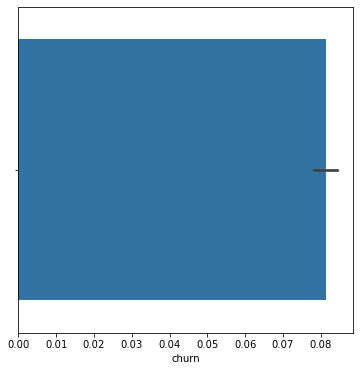

In [40]:
plt.figure(figsize=(6,6))
sns.barplot(highvalue_churn['churn'])

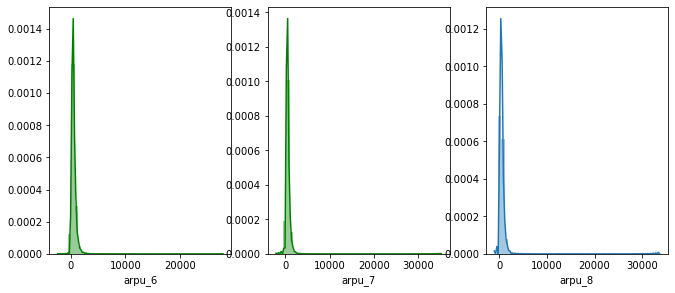

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot(2,4,1)
sns.distplot(highvalue_churn.arpu_6,color= "g")
plt.subplot(2,4,2)
sns.distplot(highvalue_churn.arpu_7,color= "g")
plt.subplot(2,4,3)
sns.distplot(highvalue_churn.arpu_8)

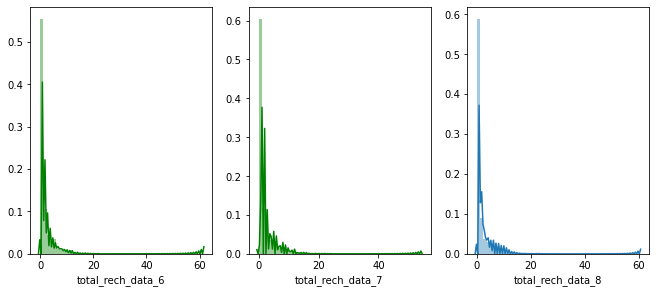

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2,4,1)
sns.distplot(highvalue_churn.total_rech_data_6,color= "g")
plt.subplot(2,4,2)
sns.distplot(highvalue_churn.total_rech_data_7,color= "g")
plt.subplot(2,4,3)
sns.distplot(highvalue_churn.total_rech_data_8)


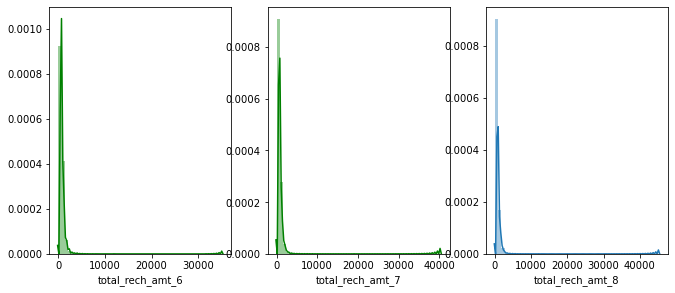

In [43]:
plt.figure(figsize=(15, 10))
plt.subplot(2,4,1)
sns.distplot(highvalue_churn.total_rech_amt_6,color= "g")
plt.subplot(2,4,2)
sns.distplot(highvalue_churn.total_rech_amt_7,color= "g")
plt.subplot(2,4,3)
sns.distplot(highvalue_churn.total_rech_amt_8)

### Biivariate Analysis
### Average Revenue Generated Per User from High Valued Customer Pool

Text(0, 0.5, 'Average Revenue per user in Month 8')

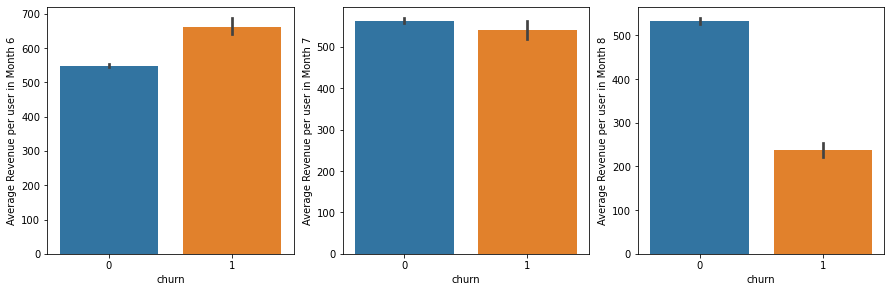

In [44]:
#Create Bar Plot
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'arpu_6', data = highvalue_churn)
plt.ylabel('Average Revenue per user in Month 6')
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'arpu_7', data = highvalue_churn)
plt.ylabel('Average Revenue per user in Month 7')
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'arpu_8', data = highvalue_churn)
plt.ylabel('Average Revenue per user in Month 8')

### Dervied Metric 



Text(0, 0.5, 'Average Revenue from Mobile Data per user in Month 8')

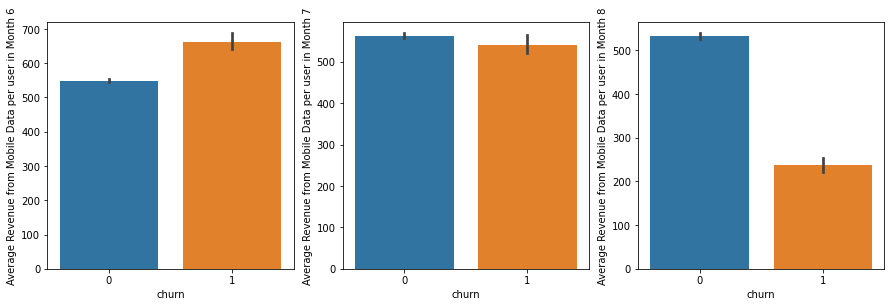

In [45]:
#Create Bar Plot
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'arpu_6', data =  highvalue_churn)
plt.ylabel('Average Revenue from Mobile Data per user in Month 6')
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'arpu_7', data =  highvalue_churn)
plt.ylabel('Average Revenue from Mobile Data per user in Month 7')
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'arpu_8', data =  highvalue_churn)
plt.ylabel('Average Revenue from Mobile Data per user in Month 8')

#### Insights 

* It can been Observed that the Churn Customers show a drop in Revenue in Action Phase where as they seem to provide a steady average revenue to the telecom Network. Hence the **Average Revenue per User (arpu)** is a an important Predictor Feature. 

* Also it can observed that **Average Revenue from Data per User (arpu_data)** has started delining from month 7 and has ramped down drastically in the Action Phase.

###  Incoming and Outgoing Analysis of High Valued Customers

In [46]:
incomingHeaders=[]
outgoingHeaders=[]
for column in highvalue_churn.columns.values:
    if 'ic' in column:
        incomingHeaders.append(column)
    if 'og' in column:
        outgoingHeaders.append(column)

ic_df=highvalue_churn[incomingHeaders]
og_df=highvalue_churn[outgoingHeaders]

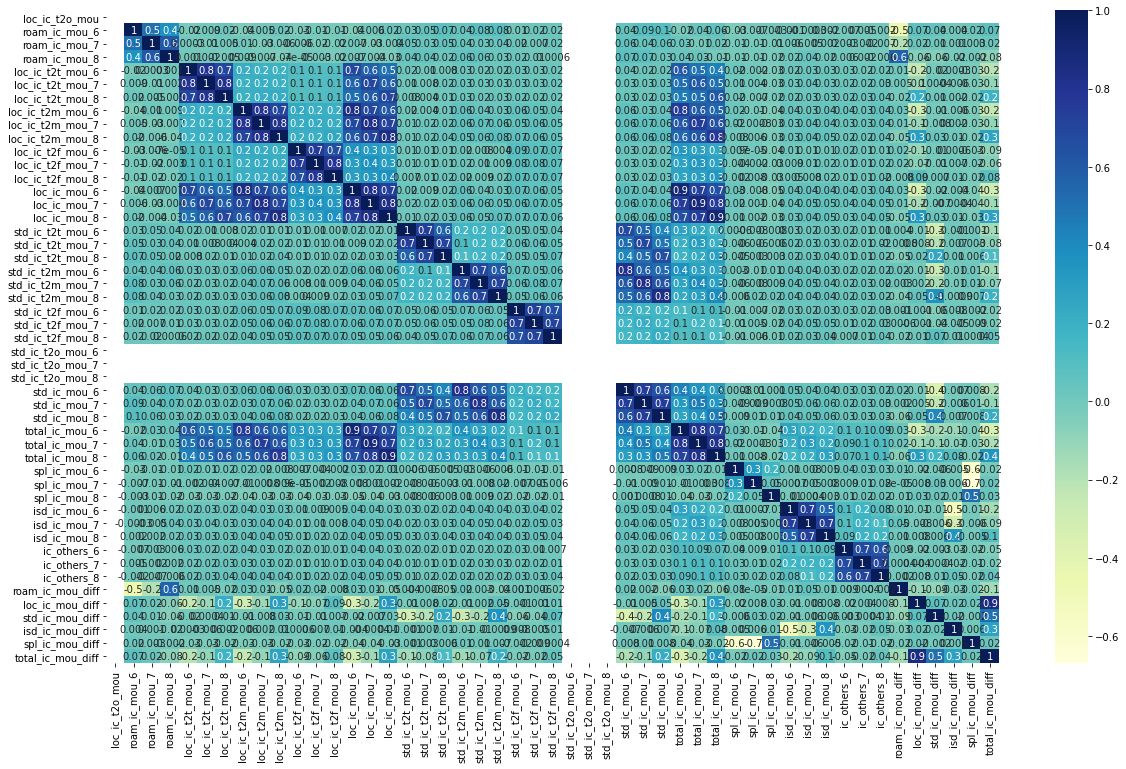

In [47]:
plt.figure(figsize = (20, 12))
sns.heatmap(ic_df.corr(), annot = True, cmap="YlGnBu",fmt='.1g')
plt.show()

### Insights 

* The Above Heat Map Shows the Correlation Between Various Features that are invloved in **Incoming Calls**.

* It can been Observed that the **loc_ic_t2t_mou** has a good correlation **60 %** with **total_ic_mou** for both Good and Action Phase.

* It can been Observed that the **loc_ic_t2m_mou** has a good correlation **70 % - 80 %** with **total_ic_mou** for both Good and Action Phase.

* It can been Observed that the **loc_ic_mou** has a strong postive correlation **90 %** with **total_ic_mou** for both Good and Action Phase.

* There is a high Chance of Multicollinearity as **loc_ic_t2t_mou ,loc_ic_t2m_mou ,loc_ic_mou** and **total_ic_mou** are very well coorelated with each other

* It can been Observed that the **std_ic_t2t_mou** has a good correlation **70 %** with **std_ic_mou** for both Good and Action Phase.

* It can been Observed that the **std_ic_t2m_mou** has a good correlation **80 %** with **std_ic_mou** for both Good and Action Phase.

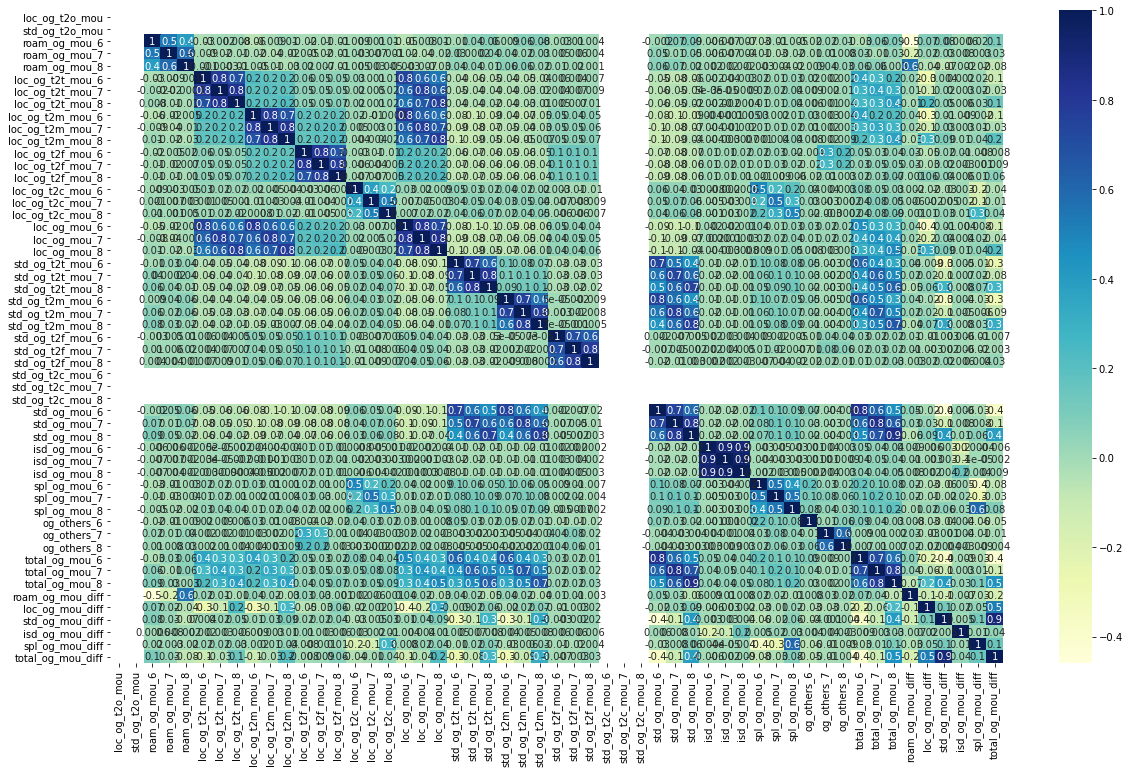

In [48]:
plt.figure(figsize = (20, 12))
sns.heatmap(og_df.corr(), annot = True, cmap="YlGnBu",fmt='.1g')
plt.show()

### Outlier Treatment

In [49]:
highvalue_churn.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.

In [50]:
# we will only cap outliers for Numnerical data 

def capOutliersFunction(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array



In [51]:
# cap outliers in the numeric columns
highvalue_churn[num_cols] = highvalue_churn[num_cols].apply(capOutliersFunction, axis=0)

In [52]:
highvalue_churn.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

In [53]:
highvalue_churn.shape

(30001, 173)

## Data Preparation and Engineering

### Churn Rate


In [54]:
churn_rate = (sum(highvalue_churn['churn'])/len(highvalue_churn['churn'].index))*100
print("The Churn Rate in Datset was found to be : ",churn_rate)

The Churn Rate in Datset was found to be :  8.136395453484884


In [55]:
imbalance = (sum(highvalue_churn['churn'] != 0)/sum(highvalue_churn['churn'] == 0))*100
print("Data Imbalance in par with Churn was found to be : ",imbalance)

Data Imbalance in par with Churn was found to be :  8.857039187227866


#### As we See the Data is Highly Imbalance as the Churn percentages is less than 10% of the total Population

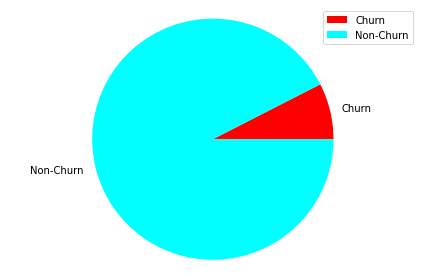

In [56]:
import matplotlib.pyplot as plt
labels = ['Churn', 'Non-Churn']
sizes = [sum(highvalue_churn['churn']),len(highvalue_churn['churn'].index)]
colors = ['red', 'cyan']
patches , texts = plt.pie(sizes, labels=labels,colors=colors)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [57]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Modelling
## Preprocessing data

In [58]:
# change churn to numeric
highvalue_churn['churn'] = pd.to_numeric(highvalue_churn['churn'])

## Train Test Split

In [59]:
# divide data into train and test
X = highvalue_churn.drop("churn", axis = 1)
y = highvalue_churn.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

## Aggregating the categorical columns

In [60]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churn, dtype: float64

In [61]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

### Before Performing Sampling 

In [62]:
print("No of Churn Labels are: ",sum(y_train))
print("No of Non-Churn Labels are: ",len(y_train)-sum(y_train))
print("churn rate :",round(sum(y_train)/len(y_train)*100,2))

print("Shape of train_X :",X_train.shape)
print('Shape of train_y:',y_train.shape)

No of Churn Labels are:  1831
No of Non-Churn Labels are:  20669
churn rate : 8.14
Shape of train_X : (22500, 172)
Shape of train_y: (22500,)


In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
sampled_X_train, sampled_y_train = sm.fit_resample(X_train, y_train)

### After Performing Sampling 

In [64]:
print("No of Churn Labels are:",sum(sampled_y_train))
print("No of Non-Churn Labels are : ",len(sampled_X_train)-sum(sampled_y_train))
print("churn rate : {}% \n".format(round(sum(sampled_y_train==1)/len(sampled_y_train)*100,2)))

print("Shape of train_X :",sampled_X_train.shape)
print('Shape of train_y:',sampled_y_train.shape)

No of Churn Labels are: 20669
No of Non-Churn Labels are :  20669
churn rate : 50.0% 

Shape of train_X : (41338, 172)
Shape of train_y: (41338,)


In [65]:
# check data type of categorical columns - make sure they are numeric
sampled_X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41338 entries, 0 to 41337
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  41338 non-null  float64
 1   night_pck_user_7  41338 non-null  float64
 2   night_pck_user_8  41338 non-null  float64
 3   fb_user_6         41338 non-null  float64
 4   fb_user_7         41338 non-null  float64
 5   fb_user_8         41338 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB


## PCA

In [66]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [67]:
pca.fit(X_train)
churn_pca = pca.fit_transform(sampled_X_train)

In [68]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.03
1       21.91
2       27.78
3       32.46
4       36.53
5       39.96
6       42.73
7       45.38
8       47.78
9       49.84
10      51.77
11      53.56
12      55.31
13      56.96
14      58.57
15      60.02
16      61.44
17      62.76
18      64.04
19      65.27
20      66.43
21      67.52
22      68.57
23      69.56
24      70.52
25      71.46
26      72.39
27      73.27
28      74.14
29      74.99
30      75.82
31      76.62
32      77.42
33      78.18
34      78.91
35      79.60
36      80.28
37      80.94
38      81.56
39      82.17
40      82.75
41      83.30
42      83.84
43      84.36
44      84.89
45      85.38
46      85.85
47      86.31
48      86.74
49      87.16
50      87.56
51      87.96
52      88.33
53      88.69
54      89.05
55      89.40
56      89.74
57      90.07
58      90.40
59      90.72
60      91.04
61      91.35
62      91.65
63      91.95
64      92.24
65      92.53
66      92.80
67      93.06
68      93.31
69      93.55
70      93.78
71    

~ 57 components explain 90% variance

~ 75 components explain 95% variance

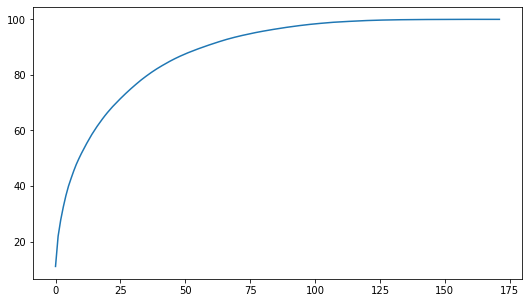

In [69]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [70]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [71]:
# fit model
pipeline.fit(sampled_X_train, sampled_y_train)

# check score on train data
pipeline.score(sampled_X_train, sampled_y_train)

0.8340026126082539

### Evaluate on test data

In [72]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5614 1277]
 [ 101  509]]
Sensitivity: 	0.83
Specificity: 	0.81
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [73]:
# class imbalance
sampled_y_train.value_counts()/sampled_y_train.shape

0    0.5
1    0.5
Name: churn, dtype: float64

In [74]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [75]:
# fit model
model.fit(sampled_X_train, sampled_y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [76]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.295470,0.102862,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,7.419072,0.303467,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,7.186944,0.143386,0.156481,0.008056,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.907452,0.906875,0.903978,0.909534,0.910010,0.907570,0.002155,14
3,8.757460,0.324980,0.170505,0.029376,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.911582,0.910247,0.908364,0.912314,0.914258,0.911353,0.001978,1
4,5.746046,0.322704,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,7.177747,0.272416,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,7.130643,0.317613,0.153684,0.029328,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906869,0.906359,0.904446,0.909438,0.910085,0.907439,0.002071,16
7,8.924832,0.118046,0.158715,0.011816,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.911105,0.910423,0.908276,0.912106,0.914036,0.911189,0.001899,6
8,5.656647,0.288835,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,7.650386,0.216568,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [77]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9113531017849634
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [78]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5669 1222]
 [  93  517]]
Sensitivity: 	0.85
Specificity: 	0.82
AUC:    	 0.9


### 1.A. Random Forest Classfier  : 'Predictive Model' Analysis 

In [79]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [80]:
# fit model
model.fit(sampled_X_train, sampled_y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [81]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9941190940186357
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [82]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6599  292]
 [ 222  388]]
Sensitivity: 	0.64
Specificity: 	0.96
AUC:    	 0.92


### `we are getting a very poor sensitivity in this case so the model does not perform good . We will go with PCA with Logistic Regression`

### 2. Using Logistic Regression for 'Feature Interpretable Model' Analysis 

Note : This Logistic Regression is used By Combining Recursive Feature Elimination On top of Balanced Data to Give the Business the Most important Predictor Variables.

In [83]:
from sklearn.feature_selection import RFE
## We use RFE to select the top 25 features and then build a logistic model on top of it.
## Instantiating a logistic regression object.
logr = LogisticRegression()

In [84]:
# Creating features to perform RFE on them.

X_train_rfe= sampled_X_train.copy()
X_test_rfe = X_test.copy()
y_train_rfe = sampled_y_train.copy()
y_test_rfe = y_test.copy()

In [85]:
rfe = RFE(logr, 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train_rfe,y_train_rfe )

In [86]:
## the features selected by RFE.
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [87]:
##list of features along with their priorities.
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 153),
 ('std_og_t2o_mou', False, 152),
 ('loc_ic_t2o_mou', False, 151),
 ('arpu_6', False, 73),
 ('arpu_7', False, 80),
 ('arpu_8', False, 119),
 ('onnet_mou_6', False, 65),
 ('onnet_mou_7', False, 33),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 136),
 ('offnet_mou_7', False, 102),
 ('offnet_mou_8', False, 101),
 ('roam_ic_mou_6', False, 56),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 7),
 ('roam_og_mou_6', False, 57),
 ('roam_og_mou_7', False, 112),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 46),
 ('loc_og_t2t_mou_7', False, 84),
 ('loc_og_t2t_mou_8', False, 14),
 ('loc_og_t2m_mou_6', False, 48),
 ('loc_og_t2m_mou_7', False, 44),
 ('loc_og_t2m_mou_8', False, 8),
 ('loc_og_t2f_mou_6', False, 21),
 ('loc_og_t2f_mou_7', False, 9),
 ('loc_og_t2f_mou_8', False, 78),
 ('loc_og_t2c_mou_6', False, 70),
 ('loc_og_t2c_mou_7', False, 40),
 ('loc_og_t2c_mou_8', False, 79),
 ('loc_og_mou_6', False, 45),
 ('loc_og_mou_7', False, 61),

In [88]:
col = X_train_rfe.columns[rfe.support_]

In [89]:
X_train_rfe.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic_mou_diff', 'total_rech_amt_diff', 'max_rech_amt_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=152)

**Using VIF and P Value to Remove the Variables that might lead to Multi Collinearity and Make sure the Final Variables are statistically Significant**

In [90]:
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm = sm.GLM(y_train_rfe,X_train_rfe_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17205.
Date:                Mon, 05 Jul 2021   Deviance:                       34409.
Time:                        22:33:14   Pearson chi2:                 7.46e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1926      0.033     36.398      0.000       1.128       1.257
roam_og_mou_8            0.0060      0.000     24.243      0.000       0.006       0.006
std_og_t2f_mou_6         0.0092      0.004      2.244      0.025       0.001       0.017
std_og_t2f_mou_8        -0.0453      0.006     -7.080      0.000      -0.058      -0.033
isd_og_mou_7             0.0100      0.001      6.699      0.000       0.007       0.013
spl_og_mou_8            -0.0112      0.002     -6.890      0.000      -0.014      -0.008
loc_ic_t2t_mou_8        -0.0051      0.000    -14.686      0.000      -0.006      -0.004
loc_ic_t2m_mou_8        -0.0059      0.000    -28.338      0.000      -0.006      -0.005
loc_ic_t2f_mou_8        -0.0121      0.001    -10.645      0.000      -0.014      -0.010
std_ic_mou_8            -0.0042      0.000    -13.879      0.000      -0.005      -0.004
isd_ic_mou_6             0.0062      0.001      9.008      0.000       0.005       0.008
isd_ic_mou_8            -0.0050      0.001     -5.968      0.000      -0.007      -0.003
total_rech_num_6         0.0398      0.004     10.606      0.000       0.032       0.047
total_rech_num_7         0.0568      0.004     14.278      0.000       0.049       0.065
total_rech_num_8        -0.1418      0.007    -21.812      0.000      -0.155      -0.129
last_day_rch_amt_8      -0.0051      0.000    -28.058      0.000      -0.005      -0.005
total_rech_data_8       -0.5261      0.024    -22.077      0.000      -0.573      -0.479
sachet_2g_8              0.2714      0.027     10.052      0.000       0.218       0.324
sep_vbc_3g              -0.0344      0.003    -13.453      0.000      -0.039      -0.029
total_rech_num_diff      0.0062      0.005      1.165      0.244      -0.004       0.017
total_rech_data_diff    -0.0272      0.008     -3.348      0.001      -0.043      -0.011
========================================================================================
"""

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,total_rech_num_8,22.81
12,total_rech_num_7,14.04
11,total_rech_num_6,13.92
18,total_rech_num_diff,11.93
15,total_rech_data_8,7.77
16,sachet_2g_8,6.94
6,loc_ic_t2m_mou_8,2.23
10,isd_ic_mou_8,1.68
9,isd_ic_mou_6,1.66
5,loc_ic_t2t_mou_8,1.65


In [93]:
## SInce we have features which are multicollinear and also have high p-value. We drop columns having high p-value first.

col = col.drop("total_rech_num_8", 1)
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8', 'isd_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'sachet_2g_8', 'sep_vbc_3g', 'total_rech_num_diff',
       'total_rech_data_diff'],
      dtype='object')

In [94]:
## Building the model again.

import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm_1 = sm.GLM(y_train_rfe,X_train_rfe_sm, family = sm.families.Binomial())
res = logm_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41318
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17348.
Date:                Mon, 05 Jul 2021   Deviance:                       34697.
Time:                        22:33:16   Pearson chi2:                 4.40e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2566      0.033     38.517      0.000       1.193       1.321
roam_og_mou_8            0.0059      0.000     23.670      0.000       0.005       0.006
std_og_t2f_mou_6         0.0096      0.004      2.361      0.018       0.002       0.018
std_og_t2f_mou_8        -0.0456      0.006     -7.122      0.000      -0.058      -0.033
isd_og_mou_7             0.0097      0.001      6.580      0.000       0.007       0.013
spl_og_mou_8            -0.0123      0.002     -7.557      0.000      -0.015      -0.009
loc_ic_t2t_mou_8        -0.0052      0.000    -14.850      0.000      -0.006      -0.004
loc_ic_t2m_mou_8        -0.0059      0.000    -28.715      0.000      -0.006      -0.006
loc_ic_t2f_mou_8        -0.0120      0.001    -10.547      0.000      -0.014      -0.010
std_ic_mou_8            -0.0044      0.000    -14.339      0.000      -0.005      -0.004
isd_ic_mou_6             0.0065      0.001      9.440      0.000       0.005       0.008
isd_ic_mou_8            -0.0053      0.001     -6.319      0.000      -0.007      -0.004
total_rech_num_6        -0.0290      0.003    -10.945      0.000      -0.034      -0.024
total_rech_num_7        -0.0148      0.002     -6.180      0.000      -0.019      -0.010
last_day_rch_amt_8      -0.0051      0.000    -28.462      0.000      -0.005      -0.005
total_rech_data_8       -0.5425      0.024    -22.672      0.000      -0.589      -0.496
sachet_2g_8              0.2792      0.027     10.306      0.000       0.226       0.332
sep_vbc_3g              -0.0346      0.003    -13.367      0.000      -0.040      -0.030
total_rech_num_diff     -0.1168      0.003    -35.687      0.000      -0.123      -0.110
total_rech_data_diff    -0.0366      0.008     -4.601      0.000      -0.052      -0.021
========================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_rech_data_8,7.76
15,sachet_2g_8,6.94
11,total_rech_num_6,6.04
12,total_rech_num_7,4.82
17,total_rech_num_diff,2.62
6,loc_ic_t2m_mou_8,2.22
10,isd_ic_mou_8,1.68
9,isd_ic_mou_6,1.66
5,loc_ic_t2t_mou_8,1.65
13,last_day_rch_amt_8,1.62


In [96]:
## Since we have features which have high VIF value, hence dropping std_og_mou_8.

col = col.drop("total_rech_data_8", 1)
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8', 'isd_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'last_day_rch_amt_8',
       'sachet_2g_8', 'sep_vbc_3g', 'total_rech_num_diff',
       'total_rech_data_diff'],
      dtype='object')

In [97]:
## Buliding the model again.

import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm_2 = sm.GLM(y_train_rfe,X_train_rfe_sm, family = sm.families.Binomial())
res = logm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41319
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17670.
Date:                Mon, 05 Jul 2021   Deviance:                       35340.
Time:                        22:33:17   Pearson chi2:                 1.07e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0757      0.031     34.563      0.000       1.015       1.137
roam_og_mou_8            0.0063      0.000     25.700      0.000       0.006       0.007
std_og_t2f_mou_6         0.0082      0.004      2.033      0.042       0.000       0.016
std_og_t2f_mou_8        -0.0442      0.006     -6.893      0.000      -0.057      -0.032
isd_og_mou_7             0.0105      0.001      7.112      0.000       0.008       0.013
spl_og_mou_8            -0.0118      0.002     -7.320      0.000      -0.015      -0.009
loc_ic_t2t_mou_8        -0.0050      0.000    -14.703      0.000      -0.006      -0.004
loc_ic_t2m_mou_8        -0.0059      0.000    -28.591      0.000      -0.006      -0.005
loc_ic_t2f_mou_8        -0.0130      0.001    -11.386      0.000      -0.015      -0.011
std_ic_mou_8            -0.0042      0.000    -13.860      0.000      -0.005      -0.004
isd_ic_mou_6             0.0064      0.001      9.494      0.000       0.005       0.008
isd_ic_mou_8            -0.0055      0.001     -6.629      0.000      -0.007      -0.004
total_rech_num_6        -0.0259      0.003     -9.857      0.000      -0.031      -0.021
total_rech_num_7        -0.0152      0.002     -6.394      0.000      -0.020      -0.011
last_day_rch_amt_8      -0.0061      0.000    -34.082      0.000      -0.006      -0.006
sachet_2g_8             -0.2815      0.011    -24.504      0.000      -0.304      -0.259
sep_vbc_3g              -0.0384      0.003    -14.244      0.000      -0.044      -0.033
total_rech_num_diff     -0.1236      0.003    -37.454      0.000      -0.130      -0.117
total_rech_data_diff    -0.0396      0.008     -5.089      0.000      -0.055      -0.024
========================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_num_6,6.02
12,total_rech_num_7,4.80
16,total_rech_num_diff,2.59
6,loc_ic_t2m_mou_8,2.22
10,isd_ic_mou_8,1.68
9,isd_ic_mou_6,1.66
5,loc_ic_t2t_mou_8,1.65
2,std_og_t2f_mou_8,1.55
13,last_day_rch_amt_8,1.52
1,std_og_t2f_mou_6,1.51


In [99]:
## dropping total_og_mou_8 as it has a high VIF value.

col = col.drop("total_rech_num_6", 1)
col

Index(['roam_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8', 'isd_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_7', 'last_day_rch_amt_8', 'sachet_2g_8', 'sep_vbc_3g',
       'total_rech_num_diff', 'total_rech_data_diff'],
      dtype='object')

In [100]:
## Buliding the model again.

import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm_3 = sm.GLM(y_train_rfe,X_train_rfe_sm, family = sm.families.Binomial())
res = logm_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41320
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17719.
Date:                Mon, 05 Jul 2021   Deviance:                       35437.
Time:                        22:33:18   Pearson chi2:                 1.99e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9706      0.029     33.405      0.000       0.914       1.028
roam_og_mou_8            0.0062      0.000     25.314      0.000       0.006       0.007
std_og_t2f_mou_6         0.0088      0.004      2.166      0.030       0.001       0.017
std_og_t2f_mou_8        -0.0428      0.006     -6.712      0.000      -0.055      -0.030
isd_og_mou_7             0.0107      0.001      7.319      0.000       0.008       0.014
spl_og_mou_8            -0.0135      0.002     -8.405      0.000      -0.017      -0.010
loc_ic_t2t_mou_8        -0.0051      0.000    -14.895      0.000      -0.006      -0.004
loc_ic_t2m_mou_8        -0.0060      0.000    -29.068      0.000      -0.006      -0.006
loc_ic_t2f_mou_8        -0.0127      0.001    -11.140      0.000      -0.015      -0.010
std_ic_mou_8            -0.0043      0.000    -14.357      0.000      -0.005      -0.004
isd_ic_mou_6             0.0061      0.001      9.147      0.000       0.005       0.007
isd_ic_mou_8            -0.0053      0.001     -6.478      0.000      -0.007      -0.004
total_rech_num_7        -0.0264      0.002    -12.586      0.000      -0.030      -0.022
last_day_rch_amt_8      -0.0059      0.000    -33.432      0.000      -0.006      -0.006
sachet_2g_8             -0.2887      0.011    -25.319      0.000      -0.311      -0.266
sep_vbc_3g              -0.0382      0.003    -14.187      0.000      -0.043      -0.033
total_rech_num_diff     -0.1079      0.003    -38.259      0.000      -0.113      -0.102
total_rech_data_diff    -0.0449      0.008     -5.767      0.000      -0.060      -0.030
========================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_num_7,2.96
6,loc_ic_t2m_mou_8,2.20
15,total_rech_num_diff,1.84
10,isd_ic_mou_8,1.68
9,isd_ic_mou_6,1.65
5,loc_ic_t2t_mou_8,1.64
2,std_og_t2f_mou_8,1.55
12,last_day_rch_amt_8,1.52
1,std_og_t2f_mou_6,1.51
7,loc_ic_t2f_mou_8,1.44


In [103]:
## Finding out the coefficients values for the selected parameters.
res = logm_3.fit().params.values
res

array([ 0.97064847,  0.00620504,  0.00875167, -0.04284829,  0.01070332,
       -0.01350966, -0.00510194, -0.00597804, -0.01266266, -0.00431206,
        0.0061042 , -0.0053131 , -0.02636009, -0.00594171, -0.28870242,
       -0.038186  , -0.10789465, -0.04485266])

In [104]:
## creating a list res_1 from the numpy array res
res_1 = list(res)
res_1

[0.9706484698726849,
 0.006205043442939649,
 0.008751674036986234,
 -0.04284829018124834,
 0.010703323282941463,
 -0.013509664039217073,
 -0.005101939990454513,
 -0.005978041870359023,
 -0.012662656828839087,
 -0.004312055674600288,
 0.0061041981675529905,
 -0.0053131034603901145,
 -0.026360094460757662,
 -0.005941712309261103,
 -0.28870241718661993,
 -0.03818600471107763,
 -0.10789465219150512,
 -0.04485266105472423]

In [105]:
## removing the coefficient for constant from the res_1.
res_1.remove(0.9706484698726849)

### Plotting Feature Importance Plot


<Figure size 1800x864 with 0 Axes>

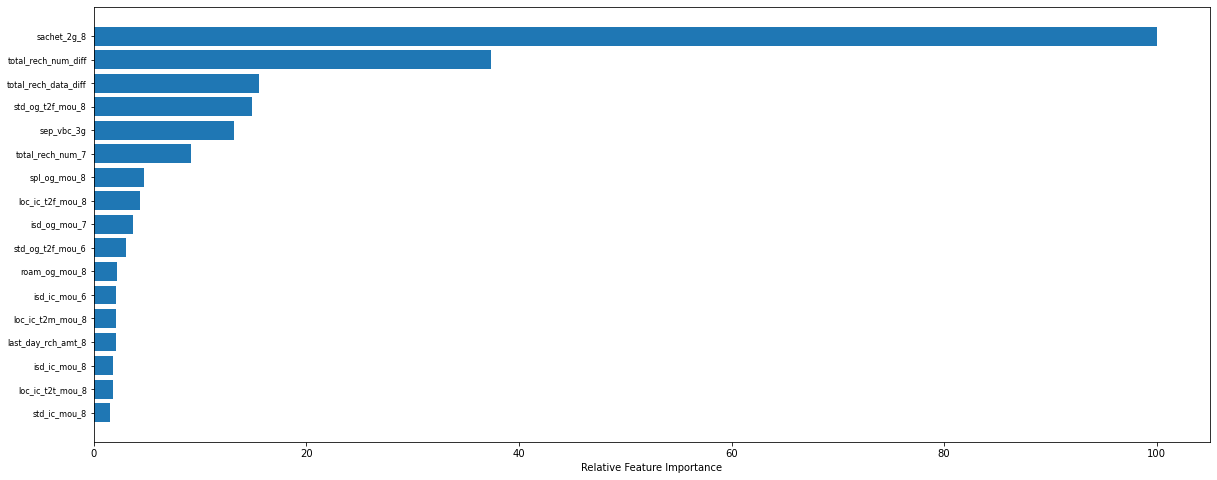

In [106]:
plt.figure(figsize=[25,12])
#feature_importance = abs(res.coef_[0])
feature_importance = np.abs(res_1)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=[20,8])
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_rfe[col].columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.show()

### Recommended Strategies to Manage customer Churn :

1.Short duration plans of lower cost can help to retain customers as we observed that total number of recharges fell in the action phase for potential churn customers from the above graph i.e `Service schemes with validity smaller than a month` parametre is the top most feature to be taken care of .


2.Outgoing and incoming calls for both on network and off network contributes in defining the potential churn, hence affordable tariff plans and good signal strength may help in retaining the customers.we have concluded this from the 2nd important feature:`total_rech_num`



3.As data recharges are the number one contributing factor for churners identification, hence companies can opt for a more economical data plan and improvement in data quality. 



4.The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.



5.Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone



                            **************************************